## 1. Download the repository

In [5]:
!git clone https://github.com/IDEA-Research/DINO.git

Cloning into 'DINO'...
remote: Enumerating objects: 442, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 442 (delta 136), reused 95 (delta 95), pack-reused 246 (from 1)
Receiving objects: 100% (442/442), 13.43 MiB | 26.00 MiB/s, done.
Resolving deltas: 100% (191/191), done.


## 2. Installation

In [6]:
%cd DINO
!pip install -r requirements.txt -q
%cd ..

/content/DINO
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 101.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.1.1 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.1 which is incompatible.
ibis-framework 8.0.0 requires numpy<2,>=1, but you have numpy 2.1.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.1.1 which is incompatible.
pandas 2.1.4 requires numpy<2,>=1.22.4; python_version < "3.11", but you have numpy 2.1.1 which is incompatibl

### Fixing Dependency Issue

#### a. When using current yapf version it is giving error like:
TypeError: FormatCode() got an unexpected keyword argument 'verify'

#### b. In case of numpy it was:
The error message was: np.float is no longer available in the version of NumPy you're using.

After searching online it was mentioned to use old version of these packages

**You need to restart the kernel after installing these packages**

In [7]:
!pip install yapf==0.40.1
!pip install --upgrade numpy===1.22.0

  Using cached numpy-1.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.0 kB)
Using cached numpy-1.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.16 requires numpy>=1.24, but you have numpy 1.22.0 which is incompatible.
albumentations 1.4.15 requires numpy>=1.24.4, but you have numpy 1.22.0 which is incompatible.
arviz 0.19.0 requires numpy>=1.23.0, but you have numpy 1.22.0 which is incompatible.
astropy 6.1.3 requires numpy>=1.23, but you have numpy 1.22.0 which is incompatible.
bigframes 1.17.0 requires numpy>=1.24.0, but you have numpy 1.22.0 which is incompatible.
chex 0.1.86 requires numpy>=1.24.1

#### Compile and install custom operations within the DINO model repository

In [1]:
%cd DINO
!python models/dino/ops/setup.py build install
%cd ..

/content/DINO
running build
running build_py
creating build
creating build/lib.linux-x86_64-cpython-310
creating build/lib.linux-x86_64-cpython-310/datasets
copying datasets/random_crop.py -> build/lib.linux-x86_64-cpython-310/datasets
copying datasets/sltransform.py -> build/lib.linux-x86_64-cpython-310/datasets
copying datasets/panoptic_eval.py -> build/lib.linux-x86_64-cpython-310/datasets
copying datasets/coco_eval.py -> build/lib.linux-x86_64-cpython-310/datasets
copying datasets/data_util.py -> build/lib.linux-x86_64-cpython-310/datasets
copying datasets/dataset.py -> build/lib.linux-x86_64-cpython-310/datasets
copying datasets/__init__.py -> build/lib.linux-x86_64-cpython-310/datasets
copying datasets/coco.py -> build/lib.linux-x86_64-cpython-310/datasets
copying datasets/transforms.py -> build/lib.linux-x86_64-cpython-310/datasets
copying datasets/coco_panoptic.py -> build/lib.linux-x86_64-cpython-310/datasets
creating build/lib.linux-x86_64-cpython-310/util
copying util/box_lo

## 3. Download & Preprocess Data

#### Download the dataset

In [3]:
import gdown

url = 'https://drive.google.com/file/d/1Ae4OC9uy_7bCy1Wd30gzOK3OPh0Ok92l/view?usp=drive_link'
output_path = 'dataset.zip'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1Ae4OC9uy_7bCy1Wd30gzOK3OPh0Ok92l
From (redirected): https://drive.google.com/uc?id=1Ae4OC9uy_7bCy1Wd30gzOK3OPh0Ok92l&confirm=t&uuid=44153f7d-c99c-432c-8151-017f241ff3d5
To: /content/dataset.zip
100%|██████████| 26.3M/26.3M [00:00<00:00, 101MB/s]


'dataset.zip'

In [2]:
import gdown

url = 'https://drive.google.com/file/d/1HVeSR3vo-UA9sd6jOJI5viN5e927gk7Y/view?usp=drive_link'
output_path = 'annotations.json'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1HVeSR3vo-UA9sd6jOJI5viN5e927gk7Y
To: /content/annotations.json
100%|██████████| 244k/244k [00:00<00:00, 59.9MB/s]


'annotations.json'

In [4]:
!unzip /content/dataset.zip -d /content/Pedestrian_dataset

Archive:  /content/dataset.zip
   creating: /content/Pedestrian_dataset/Pedestrian_dataset_for_internship_assignment/
  inflating: /content/Pedestrian_dataset/__MACOSX/._Pedestrian_dataset_for_internship_assignment  
  inflating: /content/Pedestrian_dataset/Pedestrian_dataset_for_internship_assignment/13199.jpg  
  inflating: /content/Pedestrian_dataset/__MACOSX/Pedestrian_dataset_for_internship_assignment/._13199.jpg  
  inflating: /content/Pedestrian_dataset/Pedestrian_dataset_for_internship_assignment/12046.jpg  
  inflating: /content/Pedestrian_dataset/__MACOSX/Pedestrian_dataset_for_internship_assignment/._12046.jpg  
  inflating: /content/Pedestrian_dataset/Pedestrian_dataset_for_internship_assignment/7440.jpg  
  inflating: /content/Pedestrian_dataset/__MACOSX/Pedestrian_dataset_for_internship_assignment/._7440.jpg  
  inflating: /content/Pedestrian_dataset/Pedestrian_dataset_for_internship_assignment/13984.jpg  
  inflating: /content/Pedestrian_dataset/__MACOSX/Pedestrian_datas

#### Preprocess the dataset

In [5]:
import json
import os
import shutil
from sklearn.model_selection import train_test_split

images_dir = '/content/Pedestrian_dataset/Pedestrian_dataset_for_internship_assignment'
annotations_path = '/content/annotations.json'
output_dir = '/content/COCO_split'

train_images_dir = os.path.join(output_dir, 'train2017')
val_images_dir = os.path.join(output_dir, 'val2017')
annotations_dir = os.path.join(output_dir, 'annotations')
train_annotations_path = os.path.join(annotations_dir, 'instances_train2017.json')
val_annotations_path = os.path.join(annotations_dir, 'instances_val2017.json')

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(annotations_dir, exist_ok=True)

with open(annotations_path, 'r') as f:
    coco_data = json.load(f)

images = coco_data['images']
train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

def filter_annotations(images, annotations):
    image_ids = [img['id'] for img in images]
    filtered_annotations = [ann for ann in annotations if ann['image_id'] in image_ids]
    return filtered_annotations

train_annotations = filter_annotations(train_images, coco_data['annotations'])
val_annotations = filter_annotations(val_images, coco_data['annotations'])

train_coco_data = {
    'images': train_images,
    'annotations': train_annotations,
    'categories': coco_data['categories']
}

val_coco_data = {
    'images': val_images,
    'annotations': val_annotations,
    'categories': coco_data['categories']
}

with open(train_annotations_path, 'w') as f:
    json.dump(train_coco_data, f, indent=4)

with open(val_annotations_path, 'w') as f:
    json.dump(val_coco_data, f, indent=4)

def copy_images(images, src_dir, dest_dir):
    for img in images:
        img_filename = img['file_name']
        src_path = os.path.join(src_dir, img_filename)
        dest_path = os.path.join(dest_dir, img_filename)
        shutil.copy(src_path, dest_path)

copy_images(train_images, images_dir, train_images_dir)
copy_images(val_images, images_dir, val_images_dir)

print("Dataset split completed!")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 1.22.0)
  from scipy.sparse import csr_matrix, issparse


Dataset split completed!


#### Visualize the bounding box on images using annotations

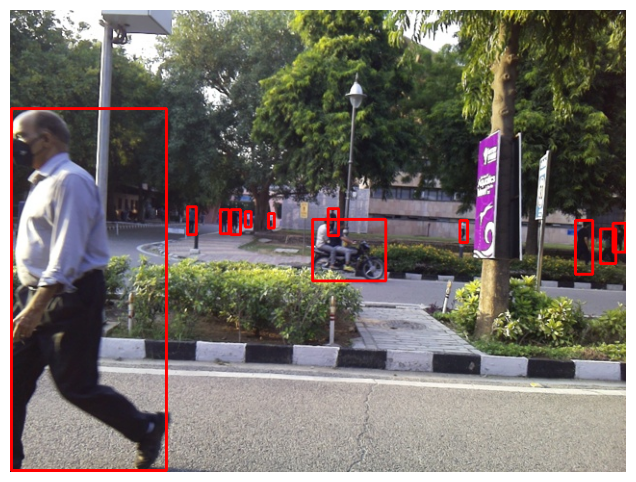

In [6]:
import json
import cv2
import matplotlib.pyplot as plt
import os

annotations_path = '/content/COCO_split/annotations/instances_train2017.json'
images_dir = '/content/COCO_split/train2017'

with open(annotations_path, 'r') as f:
    annotations = json.load(f)

image_id_to_file = {img['id']: img['file_name'] for img in annotations['images']}

def visualize_bounding_boxes(image_id):
    image_file = image_id_to_file[image_id]
    image_path = os.path.join(images_dir, image_file)

    image = cv2.imread(image_path)
    if image is None:
        print(f"Image {image_file} not found!")
        return

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for annotation in annotations['annotations']:
        if annotation['image_id'] == image_id:
            bbox = annotation['bbox']
            x, y, width, height = map(int, bbox)
            cv2.rectangle(image_rgb, (x, y), (x + width, y + height), (255, 0, 0), 2)

    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

visualize_bounding_boxes(image_id=159)

## 4. Download the Model

In [7]:
import gdown

url = 'https://drive.google.com/file/d/1eeAHgu-fzp28PGdIjeLe-pzGPMG2r2G_/view?usp=drive_link'
output_path = 'dino_checkpoint.pth'
gdown.download(url, output_path, quiet=False,fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1eeAHgu-fzp28PGdIjeLe-pzGPMG2r2G_
From (redirected): https://drive.google.com/uc?id=1eeAHgu-fzp28PGdIjeLe-pzGPMG2r2G_&confirm=t&uuid=df2ea342-74ab-4ed2-90be-8c1f0a94c53f
To: /content/dino_checkpoint.pth
100%|██████████| 562M/562M [00:02<00:00, 234MB/s]


'dino_checkpoint.pth'

## 5. Run evaluations on the validation set using the pre-trained weights

In [8]:
%cd DINO
!bash /content/DINO/scripts/DINO_eval.sh /content/COCO_split /content/dino_checkpoint.pth

/content/DINO
Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 11:45:29.277]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[09/24 11:45:29.277]: Command: main.py --output_dir logs/DINO/R50-MS4-%j -c config/DINO/DINO_4scale.py --coco_path /content/COCO_split --eval --resume /content/dino_checkpoint.pth --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 11:45:29.278]: Full config saved to logs/DINO/R50-MS4-%j/config_args_all.json
[09/24 11:45:29.278]: world size: 1
[09/24 11:45:29.278]: rank: 0
[09/24 11:45:29.278]: local_rank: 0
[09/24 11:45:29.278]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/COCO_split', coco_panoptic_path=None, remove_difficult=Fal

## 6. Create script to fine tune the model

In [10]:
import os

script_dir = '/content/DINO/scripts'
script_path = os.path.join(script_dir, 'DINO_fine_tune.sh')

os.makedirs(script_dir, exist_ok=True)

script_content = '''#!/bin/bash
coco_path=$1
output_dir=$2
pretrained_checkpoint=$3

python main.py \\
  --output_dir $output_dir \\
  --config_file config/DINO/DINO_4scale.py \\
  --coco_path $coco_path \\
  --pretrain_model_path $pretrained_checkpoint \\
  --options dn_scalar=100 embed_init_tgt=True \\
  dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False \\
  dn_box_noise_scale=1.0
'''

with open(script_path, 'w') as f:
    f.write(script_content)

print(f"File '{script_path}' created successfully!")

File '/content/DINO/scripts/DINO_fine_tune.sh' created successfully!


In [11]:
!apt-get install dos2unix

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
dos2unix is already the newest version (7.4.2-2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [12]:
!dos2unix /content/DINO/scripts/DINO_fine_tune.sh

dos2unix: converting file /content/DINO/scripts/DINO_fine_tune.sh to Unix format...


#### Start Fine Tuning the model

In [13]:
!bash /content/DINO/scripts/DINO_fine_tune.sh /content/COCO_split /content/DINO/logs/fine_tuned /content/dino_checkpoint.pth

Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 11:48:35.573]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[09/24 11:48:35.573]: Command: main.py --output_dir /content/DINO/logs/fine_tuned --config_file config/DINO/DINO_4scale.py --coco_path /content/COCO_split --pretrain_model_path /content/dino_checkpoint.pth --options dn_scalar=100 embed_init_tgt=True dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 11:48:35.574]: Full config saved to /content/DINO/logs/fine_tuned/config_args_all.json
[09/24 11:48:35.574]: world size: 1
[09/24 11:48:35.574]: rank: 0
[09/24 11:48:35.574]: local_rank: 0
[09/24 11:48:35.574]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/COCO_split', coco_panoptic_path=None,

#### Visualize the loss graphs generated during fine-tuning.

In [ ]:
import matplotlib.pyplot as plt
import json

log_file_path = '/content/DINO/logs/fine_tuned/logs.txt'

loss_data = []
with open(log_file_path, 'r') as log_file:
    for line in log_file:
        loss_data.append(json.loads(line))

epochs = list(range(1, len(loss_data) + 1))
train_losses = [entry.get('train_loss', None) for entry in loss_data]
test_losses = [entry['test_loss'] for entry in loss_data]

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Train Loss', color='blue', linestyle='--')
plt.plot(epochs, test_losses, label='Test Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Loss Over Time During Fine-Tuning')
plt.legend()
plt.grid(True)
plt.show()

#### Run evaluations on fine tune model

Previous average loss : **5.5146**<br>
Fine Tuned average loss : **3.73**

In [14]:
!bash /content/DINO/scripts/DINO_eval.sh /content/COCO_split /content/DINO/logs/fine_tuned/checkpoint.pth

Not using distributed mode
Loading config file from config/DINO/DINO_4scale.py
[09/24 12:28:10.862]: git:
  sha: d84a491d41898b3befd8294d1cf2614661fc0953, status: clean, branch: main

[09/24 12:28:10.863]: Command: main.py --output_dir logs/DINO/R50-MS4-%j -c config/DINO/DINO_4scale.py --coco_path /content/COCO_split --eval --resume /content/DINO/logs/fine_tuned/checkpoint.pth --options dn_scalar=100 embed_init_tgt=TRUE dn_label_coef=1.0 dn_bbox_coef=1.0 use_ema=False dn_box_noise_scale=1.0
[09/24 12:28:10.863]: Full config saved to logs/DINO/R50-MS4-%j/config_args_all.json
[09/24 12:28:10.863]: world size: 1
[09/24 12:28:10.863]: rank: 0
[09/24 12:28:10.863]: local_rank: 0
[09/24 12:28:10.863]: args: Namespace(config_file='config/DINO/DINO_4scale.py', options={'dn_scalar': 100, 'embed_init_tgt': True, 'dn_label_coef': 1.0, 'dn_bbox_coef': 1.0, 'use_ema': False, 'dn_box_noise_scale': 1.0}, dataset_file='coco', coco_path='/content/COCO_split', coco_panoptic_path=None, remove_difficult=F

## 7. Visualizing Results

In [15]:
%cd DINO

[Errno 2] No such file or directory: 'DINO'
/content/DINO


In [16]:
import os, sys
import torch, json
import numpy as np

from main import build_model_main
from util.slconfig import SLConfig
from datasets import build_dataset
from util.visualizer import COCOVisualizer
from util import box_ops

In [17]:
model_config_path = "/content/DINO/config/DINO/DINO_4scale.py"
model_checkpoint_path = "/content/DINO/logs/fine_tuned/checkpoint.pth"

In [18]:
with open('/content/DINO/util/coco_id2name.json') as f:
    id2name = json.load(f)
    id2name = {int(k):v for k,v in id2name.items()}

#### You might need to restart the kernel after installing below package

In [19]:
%cd ..
!git clone https://github.com/fundamentalvision/Deformable-DETR.git
!pip install MultiScaleDeformableAttention
%cd DINO

/content
Cloning into 'Deformable-DETR'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 98 (delta 27), reused 25 (delta 25), pack-reused 37 (from 1)
Receiving objects: 100% (98/98), 383.50 KiB | 1.65 MiB/s, done.
Resolving deltas: 100% (31/31), done.
/content/DINO


In [20]:
args = SLConfig.fromfile(model_config_path)
args.device = 'cuda'

model, criterion, postprocessors = build_model_main(args)
checkpoint = torch.load(model_checkpoint_path, map_location='cpu')
model.load_state_dict(checkpoint['model'])
_ = model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
<ipython-input-20-f4ffa71862c1>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more detail

In [21]:
args.dataset_file = 'coco'
args.coco_path = "/content/COCO_split"
args.fix_size = False

dataset_val = build_dataset(image_set='val', args=args)

data_aug_params: {
  "scales": [
    480,
    512,
    544,
    576,
    608,
    640,
    672,
    704,
    736,
    768,
    800
  ],
  "max_size": 1333,
  "scales2_resize": [
    400,
    500,
    600
  ],
  "scales2_crop": [
    384,
    600
  ]
}
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [22]:
image, targets = dataset_val[20]

#### Original Bounding Box

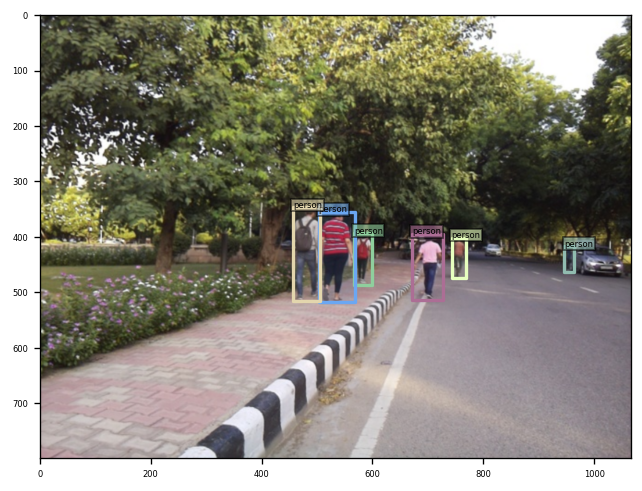

In [23]:
box_label = [id2name[int(item)] for item in targets['labels']]
gt_dict = {
    'boxes': targets['boxes'],
    'image_id': targets['image_id'],
    'size': targets['size'],
    'box_label': box_label,
}
vslzr = COCOVisualizer()
vslzr.visualize(image, gt_dict, savedir=None)

In [24]:
output = model.cuda()(image[None].cuda())
output = postprocessors['bbox'](output, torch.Tensor([[1.0, 1.0]]).cuda())[0]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [25]:
thershold = 0.3 # set a thershold

scores = output['scores']
labels = output['labels']
boxes = box_ops.box_xyxy_to_cxcywh(output['boxes'])
select_mask = scores > thershold

#### Model Bounding Box

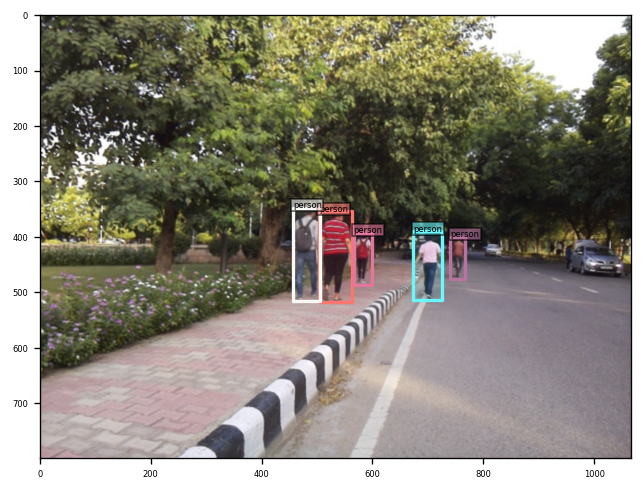

In [26]:
box_label = [id2name[int(item)] for item in labels[select_mask]]
pred_dict = {
    'boxes': boxes[select_mask],
    'size': targets['size'],
    'box_label': box_label
}
vslzr.visualize(image, pred_dict, savedir=None)